## Teoría y ejemplos de redes neuronales no supervisadas y supervisadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## Red de Funciones de Base Radial (RBF - Moody-Darken)

Una **Red de Base Radial (RBF)** es una red neuronal con una capa oculta que utiliza funciones de base radial como funciones de activación. Se emplean frecuentemente en clasificación no lineal y aproximación de funciones.

## Arquitectura y Teoría
1. **Capa de entrada:** Normaliza los datos de entrada.
2. **Capa oculta (RBF):** Cada neurona calcula una función Gaussiana centrada en un punto específico del espacio de entrada:

\phi_i(x) = \exp\left( -\frac{\|x - c_i\|^2}{2\sigma_i^2} \right) \

Donde:
- \( c_i \) es el centro de la neurona \( i \), obtenido por K-means.
- \\sigma_i  es la desviación estándar que controla la dispersión de la función aussiana.
3. **Capa de salida:** Utiliza regresión logística para predecir la clase basada en las activaciones \( \phi_i(x) \).

C:\Users\gsent\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


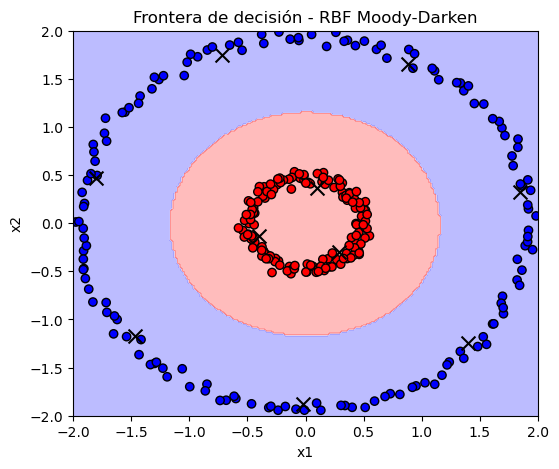

In [3]:
### Explicación del Código
# Genera datos con estructura circular para clasificación no lineal
X, y = make_circles(n_samples=300, noise=0.02, factor=0.25, random_state=0)

# Normaliza los datos para que estén en la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplica PCA para reducción de dimensionalidad (seguridad para casos de mayor dimensión)
pca = PCA(n_components=2)
X_scaled = pca.fit_transform(X_scaled)

# Aplica KMeans para encontrar k=10 centros de RBF
k = 10
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_scaled)
centros = kmeans.cluster_centers_

# Calcula las desviaciones estándar sigma usando los vecinos más cercanos entre los centros
D = cdist(centros, centros)
sigmas = np.mean(np.sort(D, axis=1)[:, 1:4], axis=1)

# Construye la matriz de activaciones RBF
def rbf(X, centros, sigmas):
    Phi = np.zeros((X.shape[0], len(centros)))
    for i, c in enumerate(centros):
        Phi[:, i] = np.exp(-np.linalg.norm(X - c, axis=1) ** 2 / (2 * sigmas[i] ** 2))
    return Phi

Phi = rbf(X_scaled, centros, sigmas)

# Entrena un clasificador lineal sobre las activaciones RBF
clf = LogisticRegression().fit(Phi, y)

# Visualiza la frontera de decisión
xx, yy = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))
Xgrid = np.c_[xx.ravel(), yy.ravel()]
Phi_grid = rbf(Xgrid, centros, sigmas)
Z = clf.predict(Phi_grid).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap='bwr')
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=100, marker='x')
plt.title("Frontera de decisión - RBF Moody-Darken")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Clasificación de un nuevo punto usando la red RBF
#x_new = np.array([[0.5, -0.2]])
#x_new_scaled = scaler.transform(x_new)
#phi_new = rbf(x_new_scaled, centros, sigmas)
#y_pred = clf.predict(phi_new)
#print("Clase predicha (RBF):", y_pred[0])